# Homework

Fill your code where `# TODO` is placed.


In [9]:
import pickle

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import matplotlib.pyplot as plt

from itertools import product

%matplotlib inline

## Read Dataset

- Data Description
  - trainset = (X_train, y_train)
    - X_train.shape = (2500, 2)
    - y_train.shape = (2500, 1)
  - testset = (X_test, y_test)
    - X_test.shape = (500, 2)
    - y_test.shape = (500, 1)
    
- What to do?
  - train a neural network which classify two class.
  
  
- **HINT** : These functions might help you. (Although it's your job to find out how to properly use these!)
  - ```torch.softmax```
  - ```X.unsqueeze(0)```
  - ```X.item()```

In [126]:
with open('train.pkl', 'rb') as f:
    trainset = pickle.load(f)
    
with open('test.pkl', 'rb') as f:
    testset = pickle.load(f)
    
trainset = list(zip(trainset[0], trainset[1]))
testset = list(zip(testset[0], testset[1]))

In [35]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = torch.softmax(x, dim=-1)
        return x

## Train

In [158]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [132]:
def train(model, trainset, optimizer, criterion):
    train_loss = 0.
    for x, y in trainset:
        pred = model(torch.FloatTensor(x))
        loss = criterion(pred.unsqueeze(0), torch.tensor(y).unsqueeze(0))
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
        model.zero_grad()
    return train_loss / 2500. ## X_train.shape

## Test

In [133]:
def test(model, testset, criterion):  # we don't need optimizer here!
    test_loss = 0.
    for x, y in testset:
        pred = model(torch.FloatTensor(x))
        loss = criterion(pred.unsqueeze(0), torch.tensor(y).unsqueeze(0))
        test_loss += loss.item()
    return test_loss / 500.  # X_test.shape

## Full pipeline

In [168]:
epochs = 10
for epoch in range(epochs):
    train_loss = train(model, trainset, optimizer, criterion)
    test_loss = test(model, testset, criterion)
    print(f'[Epoch {epoch}] Train_loss : {train_loss}, Test_loss : {test_loss}')
    if test_loss < 0.32:
        break

[Epoch 0] Train_loss : 0.45361700415611267, Test_loss : 0.4450672211647034
[Epoch 1] Train_loss : 0.43345592387914655, Test_loss : 0.42985922074317934
[Epoch 2] Train_loss : 0.42175589430332183, Test_loss : 0.4197019215226173
[Epoch 3] Train_loss : 0.4135069179773331, Test_loss : 0.4118190665245056
[Epoch 4] Train_loss : 0.4068221407055855, Test_loss : 0.40505845403671265
[Epoch 5] Train_loss : 0.4008749452829361, Test_loss : 0.3988751803636551
[Epoch 6] Train_loss : 0.3952941245079041, Test_loss : 0.3930205106139183


KeyboardInterrupt: 

## Visualize your neural network outputs

- Pass the `viz_X` tensor to the networks and visualize the outputs with matplotlib

In [156]:
viz_X = np.array(list(product(np.linspace(-1.3, 2.3, 50, dtype=np.float32), 
                              np.linspace(-0.8, 1.3, 50, dtype=np.float32))))

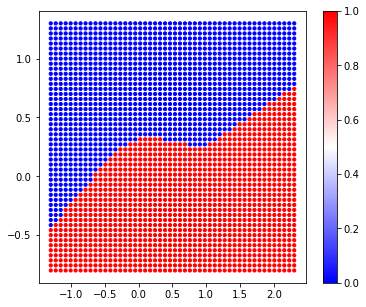

In [169]:
# TODO
y = model(torch.tensor(viz_X))
d = torch.argmax(y, dim=1).reshape(50, 50)

#y = np.random.randn(50*50)
# replace y with your predicted y

plt.figure(figsize=(6, 5))
plt.scatter(viz_X[:,0], viz_X[:, 1], c=d, s=10, cmap='bwr', vmin=0, vmax=1)
plt.colorbar()

In [162]:
y

tensor([[0.5628, 0.4372],
        [0.5624, 0.4376],
        [0.5621, 0.4379],
        ...,
        [0.5866, 0.4134],
        [0.5875, 0.4125],
        [0.5883, 0.4117]], grad_fn=<SoftmaxBackward0>)

## Save Model

In [16]:
torch.save(model.state_dict(), 'model.pth')

## Load Model

In [17]:
state_dict = torch.load('model.pth')
model.load_state_dict(state_dict)

In [18]:
state_dict

OrderedDict([('fc1.weight', tensor([[-0.6204,  0.2821],
                      [-0.0888,  0.2845],
                      [ 0.4746,  0.1887],
                      [-0.4009,  0.1395],
                      [ 0.6533,  0.1508],
                      [-0.3977,  0.6477],
                      [-0.5846, -0.6077],
                      [ 0.0524,  0.3356],
                      [-0.6752, -0.3542],
                      [-0.0398,  0.6378]])),
             ('fc1.bias',
              tensor([-0.2501,  0.0195,  0.2331,  0.3884, -0.6410,  0.5526, -0.0298,  0.7022,
                      -0.5831, -0.5942])),
             ('fc2.weight',
              tensor([[ 0.0484, -0.1603, -0.2980,  0.2155, -0.0515, -0.2634,  0.1276, -0.2790,
                       -0.1059, -0.0760],
                      [-0.0134, -0.0763,  0.3067,  0.2720,  0.0017, -0.3070,  0.1509,  0.1158,
                        0.0174, -0.1213]])),
             ('fc2.bias', tensor([-0.0563, -0.2443]))])